# IE6511 Homework 9
Done by: Aloisius Stephen and Yang Xiaozhou

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(6511)
np.set_printoptions(precision=3)

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

## 1. Surrogate Optimization with Pareto Selection (SOP) – Center Selection (15 points)

a) Yes there are 4 non-dominated fronts

1st Front: {10, 6, 5} <br>
2nd Front: {2, 1, 4, 12, 3} <br>
3rd Front: {7, 9, 8} <br> 
4th Front: {11}<br>


b) Center points: {10, 5, 2}

c) Center points: {10, 6, 12}

## 2.	No Free Lunch Theorem (10 points) 

a) There are $10^{32}$ possible $J_K(x)$, i.e. $|Z| = 10^{32}$

b) There are $5^{32}=$ possible $J_K(x)$ with objective value less than 6 forall possible binary string of length 5, i.e. $|G|=5^{32}$

One example of just a function would be where $J_K(x) = 5, \forall x\in dom(x)$

The ratio of $|Z|/|G| = 10^{32}/5^{32} = 2^{32} = 10^{32 \log 2} \approx 10^{9.6}$

c)It is given that:
\begin{align*}
\sum_{J \in Z_1} P(M | J_k,1000, GA) = 0.5, \quad \sum_{J \in Z_1} P(M | J_k,1000, ES) = 0.4
\end{align*}

Therefore to obtain the difference:
\begin{align*}
&\sum_{J \in Z_2} P(M | J_k,1000, GA)- \sum_{J \in Z_2} P(M | J_k,1000, ES)\\
= &\sum_{J \in Z_2} P(M | J_k,1000, GA) + \sum_{J \in Z_1} P(M | J_k,1000, GA)- \sum_{J \in Z_1} P(M | J_k,1000, GA)\\ &-\left( \sum_{J \in Z_2} P(M | J_k,1000, ES) + \sum_{J \in Z_1} P(M | J_k,1000, ES) - \sum_{J \in Z_1} P(M | J_k,1000, ES) \right)\\
= & \sum_{J \in Z} P(M | J_k,1000, GA) - \sum_{J \in Z_1} P(M | J_k,1000, GA) -\left( \sum_{J \in Z} P(M | J_k,1000, ES)- \sum_{J \in Z_1} P(M | J_k,1000, ES) \right) \\
=&  \sum_{J \in Z} P(M | J_k,1000, GA) - \sum_{J \in Z} P(M | J_k,1000, ES)  - \sum_{J \in Z_1} P(M | J_k,1000, GA) + \sum_{J \in Z_1} P(M | J_k,1000, ES)
\end{align*}

By No-Free Lunch Theorem, we have $ \sum_{J \in Z} P(M | J_k,1000, GA) = \sum_{J \in Z} P(M | J_k,1000, ES)$, <br> and so

\begin{align*}
\sum_{J \in Z_2} P(M | J_k,1000, GA)- \sum_{J \in Z_2} P(M | J_k,1000, ES)
&= 0  - \sum_{J \in Z_1} P(M | J_k,1000, GA) + \sum_{J \in Z_1} P(M | J_k,1000, ES) \\
&= - 0.5 + 0.4\\
&= - 0.1
\end{align*}

The difference is thus $0.1$

## 3.	Efficient Global Optimization 

a) The Expected improvement can be calculated following the formula:
\begin{align*}
E[I(x)] = (f_{min} - \hat{y}(x)) \Phi\left(\frac{f_{min} - \hat{y}(x)}{\hat{s}(x)} \right) + \hat{s}(x) \phi\left(\frac{f_{min} - \hat{y}(x)}{\hat{s}(x)} \right)
\end{align*}

The point with the highest Expected Improvement will be selected, which is $x_c =  0.8451$ with $E[I(x)] = 7.612$.

b)<br>
Advantages:
The closed form of the expected improvement function makes it easy to calculate.

Disadvantages:
Cross-validation is required which can be computationally expensive, and with higher dimensionality the computation requirements grows quickly.
Furthermore, finding the maximum expected improvement is not always easy and may take a long time to converge depending on the optimization algorithm employed.
 

## 4. Leave-one-out cross-validation (LOOCV)

a) The number of wrong predictions will be 4, which will happen for x = {-0.1, 1.6, 2, 4.1}

b)<br>
i) We can  compute the number of standard errors that the actual value is away from the predicted value with the following calculation:
\begin{align*}
\frac{y(x_c) - \hat{y}(x_c)}{\hat{s}(x_c) }
\end{align*}
And the model is valid if the number of standard deviation is within the [-3,+3] interval, since we can be 99.7% confident that the true y lies in this interval.

ii)
The error is 0 since all the predicted value $\hat{y}(x_c)$ lies with +/- 3 standard deviation 

iii) Adjust the model parameters according to the direction of deviation to reduce the error.

## 5.	(No code) Statistical Comparisons

In [2]:
data = [[1,91.94,147.90,47.66],
        [2,77.13,97.88,150.53],
        [3,10.93,39.76,97.04],
        [4,18.6,204.48,82.62],
        [5,28.63,488.83,99.89],
        [6,86.52,113.00,76.52],
        [7,64.58,141.97,87.84],
        [8,22.23,53.76,51.73],
        [9,59.75,408.20,147.51],
        [10,134.11,226.95,115.98]]

results = pd.DataFrame(data=data, columns=['Trial','SA', 'GA','GS'])

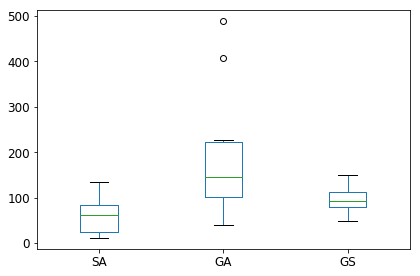

In [3]:
results.boxplot(column=['SA', 'GA','GS'], grid=False)
plt.tight_layout()

### (i)
SA achieves the best mean while GA has the largest variance. 

GA has two trials which have considerably high values compared to the rest. They can be considered as outliers.

SA performs the best since it achieves the best average value, and the variance is comparable to GS. 

### (ii)

In [4]:
ecdf = [(i+1)/(len(results.SA.sort_values())+1) for i in range(len(results.SA.sort_values()))]

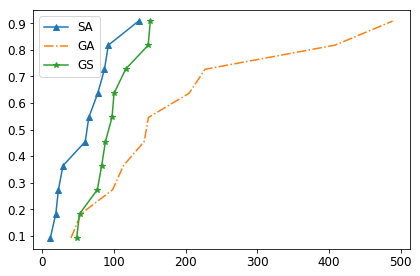

In [5]:
plt.plot(results.SA.sort_values(), ecdf, '-^')
plt.plot(results.GA.sort_values(), ecdf, '-.')
plt.plot(results.GS.sort_values(), ecdf, '-*')
plt.legend(['SA', 'GA','GS'])
plt.tight_layout()

SA performs the best, it has stochastic dominance over the other two algorithms. 

### (iii)

In [6]:
from scipy import stats

In [7]:
print('Null hypothesis: The two algorithms under test have the same average function value.\n')
print('SA vs GA')
print(stats.ttest_ind(results.SA,results.GA))
print('Conclusion: reject null hypothesis.\n')

print('SA vs GS')
print(stats.ttest_ind(results.SA,results.GS))
print('Conclusion: reject null hypothesis.\n')

print('GA vs GS')
print(stats.ttest_ind(results.GA,results.GS))
print('Conclusion: Do not reject null hypothesis.\n')

Null hypothesis: The two algorithms under test have the same average function value.

SA vs GA
Ttest_indResult(statistic=-2.7360785218425505, pvalue=0.013569206559220122)
Conclusion: reject null hypothesis.

SA vs GS
Ttest_indResult(statistic=-2.1764091445454086, pvalue=0.043083373701567035)
Conclusion: reject null hypothesis.

GA vs GS
Ttest_indResult(statistic=2.0032450315887806, pvalue=0.060443034784796887)
Conclusion: Do not reject null hypothesis.



### (iv)

Since they have the same starting solution, the samples obtained are not independent anymore. Hence t-test for independent samples is not appropirate here. Instead, t-test for related samples should be carried out.

In [8]:
print('Null hypothesis: The two algorithms under test have the same average function value.\n')
print('SA vs GS')
print(stats.ttest_rel(results.SA,results.GS))
print('Conclusion: reject null hypothesis.\n')

Null hypothesis: The two algorithms under test have the same average function value.

SA vs GS
Ttest_relResult(statistic=-2.4156435211382048, pvalue=0.038887467243471051)
Conclusion: reject null hypothesis.



It turns out that the hypothesis testing conclusion is the same.

### (v)
Null hypothesis: two sets of samples are from the same distribution. 

In [9]:
print('Null hypothesis:  The two sets of samples are from the same distribution.\n')
print('SA vs GA')
print(stats.ranksums(results.SA,results.GA))
print('Conclusion: reject null hypothesis.\n')

print('SA vs GS')
print(stats.ranksums(results.SA,results.GS))
print('Conclusion: reject null hypothesis.\n')

print('GA vs GS')
print(stats.ranksums(results.GA,results.GS))
print('Conclusion: Do not reject null hypothesis.\n')

Null hypothesis:  The two sets of samples are from the same distribution.

SA vs GA
RanksumsResult(statistic=-2.7213442056664361, pvalue=0.0065017023730818248)
Conclusion: reject null hypothesis.

SA vs GS
RanksumsResult(statistic=-1.9654152596479817, pvalue=0.049366194751932699)
Conclusion: reject null hypothesis.

GA vs GS
RanksumsResult(statistic=1.6630436812405998, pvalue=0.096303692028688256)
Conclusion: Do not reject null hypothesis.



The conclusions from Wilcoxson Rank Sum test are the same as those form Part (iii).

## 6. (No code) Performance Profile

X-axis is the performance ratio of computing time between current solver and the best solver. Y-axis is the percentage of problems that, given a certain level of performance ratio, the current solver is able to solve. 

For low values of $\tau$, i.e. 1 to 3, the solvers are allowed similar duration of time as the best solver. In this range, LOQO is the best algorithm as it has the highest percentage of solved problems compared to the other three algorithms

As the tolerance increases, MINOS become donimant in the percentage of solved problems. Hence, given a large computation time, MINOS can solve more problems than the other threes. 

LANCELOT and SNOPT have been dominated by the other two algorithms throughout the tolerance range. 